# Milestone 2
This notebook aims to delve into and elucidate the pertinent aspects of our datasets, pre-process them in advance, and conduct a preliminary analysis. The initial part encompasses loading the data and incorporates various general preprocessing techniques. The subsequent part encapsulate the preliminary analyses conducted, providing insights into the viability and soundness of our chosen idea.

---
## Contents of notebook:
- [Part 1: Getting Familiar with the Data](#Part-1:-Getting-Familiar-with-the-Data)
    - [Loading the Data](#Loading-the-Data)
    - [Merging the Data](#Merging-the-Data)
---

## Part 1: Getting Familiar with the Data

In [2]:
import pandas as pd
from datetime import datetime as dt
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ast

### Loading the Data

In [6]:
# Dataset Path
movies_path = '../MovieSummaries/movie.metadata.tsv'

# Column Names
movies_names = [
    "wikipedia_movie_ID",
    "freebase_movie_ID",
    "movie_name",
    "movie_release_date",
    "movie_box_office_revenue",
    "movie_runtime",
    "movie_languages",
    "movie_countries",
    "movie_genres",
]

#Year for the analysis
first_year = 1992
last_year = 2012


# Dataframe
movies_df = pd.read_csv(movies_path, sep = "\t", header = None, names = movies_names)

# Dataframe Cleaning 
movies_df["movie_release_date"] = pd.to_datetime(movies_df["movie_release_date"], errors = "coerce")
movies_df = movies_df[movies_df["movie_release_date"].dt.year.between(first_year, last_year)]


In [7]:
# This function transforms the data in the given input (assumed to be a string containing a dictionary like object) into a list of the values contained in the dictionary like object
def dictionary_string_to_list(input):
    res = []
    for value in (ast.literal_eval(input)).values():
        res += [value]
    return res

# We appply the above function iteratively to the genres, countries and languages columns
movies_df["movie_genres"] = movies_df["movie_genres"].apply(dictionary_string_to_list)

# We also filter to keep only the films that were shown in the USA
movies_df["movie_countries"] = movies_df["movie_countries"].apply(dictionary_string_to_list)
movies_df = movies_df[movies_df['movie_countries'].apply(lambda list : "United States of America" in list)]

movies_df["movie_languages"] = movies_df["movie_languages"].apply(dictionary_string_to_list)

movies_df = movies_df.drop(columns = ["wikipedia_movie_ID", "freebase_movie_ID"])

display(movies_df)

,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
12,Little city,1997-04-04,NaN,93.0,[English Language],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,..."
19,Keep the Change,1992-01-01,NaN,97.0,[English Language],[United States of America],[Drama]
21,New Rose Hotel,1999-10-01,21521.0,92.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie..."
...,...,...,...,...,...,...,...
81714,Dot.Kill,2005-01-01,NaN,90.0,[],[United States of America],"[Thriller, Crime Thriller, Action, Psychologic..."
81716,The Kreutzer Sonata,2008-01-01,NaN,99.0,[],[United States of America],"[Romantic drama, Romance Film, Drama, Film ada..."
81725,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81726,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri..."


### Part 2: Get the box office revenue for the USA
We obtain data for the box office revenue from the Watch Mojo website. Then, we load it and merge it to our current dataset.

In [11]:
# Dataset Path
usBoxOffice_path = "./boxofficemojo_august_2019.csv"

# Column Names
usBoxOffice_names = [
    "rank",
    "movie_name",
    "studio",
    "domestic_movie_box_office_revenue",
    "year",
]

# Dataframe
usBoxOffice_df = pd.read_csv(usBoxOffice_path, sep = ",", header = 0, names = usBoxOffice_names)

# Dataframe Cleaning
usBoxOffice_df = usBoxOffice_df[usBoxOffice_df["year"].between(first_year, last_year)]
usBoxOffice_df = usBoxOffice_df.drop(columns = ["rank", "year"])

display(usBoxOffice_df)

,movie_name,domestic_movie_box_office_revenue
2,Avatar,760507625
5,Titanic,659363944
7,Marvel's The Avengers,623357910
10,The Dark Knight,535234033
14,Star Wars: Episode I - The Phantom Menace,474544677
...,...,...
16530,Playback,264
16533,"Pretty Village, Pretty Flame",211
16536,The Objective,95
16537,Dog Eat Dog,80


### Merging the Data
As the Box Office Mojo dataset solely features movie titles without any corresponding identification, we merged it with the CMU Movie Summary Corpus Dataset using the common identifier of movie_name. This merged dataset now incorporates details regarding the U.S. domestic box office revenue, a crucial element for our analytical endeavors.

In [12]:
# Dataframes Merge
movies_df = pd.merge(
    left = movies_df,
    right = usBoxOffice_df,
    how = "left",
    on = ["movie_name"],
)

# We remove the movies that do not have a box office value in the US using the added data
movies_df = movies_df[movies_df["domestic_movie_box_office_revenue"].notna()]

# We also remove movies that do not have any genres, for future analysis
movies_df = movies_df.drop(movies_df[movies_df['movie_genres'].apply(lambda input: len(input)) == 0].index)

display(movies_df)

,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,domestic_movie_box_office_revenue
4,New Rose Hotel,1999-10-01,21521.0,92.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie...",21521.0
5,White on Rice,2009-01-01,NaN,82.0,[],[United States of America],"[Romantic comedy, Romance Film, Comedy, Indie]",69171.0
6,Baby Boy,2001-06-27,29381649.0,123.0,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",28734552.0
11,The Great New Wonderful,2006-06-23,172055.0,87.0,[English Language],[United States of America],"[Drama, Ensemble Film, Comedy-drama, Indie]",150142.0
25,Things to Do in Denver When You're Dead,1995-10-01,529677.0,115.0,[English Language],[United States of America],"[Thriller, Crime Fiction, Crime Comedy, Gangst...",529766.0
...,...,...,...,...,...,...,...,...
13742,Twister,1996-05-10,494471524.0,113.0,[English Language],[United States of America],"[Action/Adventure, Disaster]",241721524.0
13743,Source Code,2011-03-11,147332697.0,93.0,[English Language],"[France, United States of America]","[Thriller, Science Fiction, Action/Adventure, ...",54712227.0
13744,How to Eat Fried Worms,2006-08-25,13040527.0,98.0,[English Language],[United States of America],"[Family Film, Drama, Comedy, Film adaptation]",13040527.0
13750,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]",6944471.0


### Part 3: Dealing with columns that have multiple values
Then, we create a dataframe handling the genres, countries and languages columns in the data, in order to make them easier to handle in the future. This is achieved by creating a 'dummy' version for each of these variables.

In [13]:
# We need to define the dummy variables not for each possible list containing genres, but for genres within said lists. This function handles this added layer. 
def define_dummy_variables(df, column):
    series = df[column]
    result = pd.get_dummies(series.apply(pd.Series).stack()).sum(level=0)
    return result

Genres_df = define_dummy_variables(movies_df, 'movie_genres')
Countries_df = define_dummy_variables(movies_df, 'movie_countries')
Language_df = define_dummy_variables(movies_df, 'movie_languages')

C:\Users\PC\AppData\Local\Temp\ipykernel_13048\2991507986.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result = pd.get_dummies(series.apply(pd.Series).stack()).sum(level=0)
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\2991507986.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  result = pd.get_dummies(series.apply(pd.Series).stack()).sum(level=0)
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\2991507986.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  result = pd.get_dummies(series.apply(pd.Series).stack()).sum(level=0)
C:\Users\PC\AppData

,Absurdism,Acid western,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,Adult,Adventure,Adventure Comedy,...,Vampire movies,War film,Werewolf fiction,Western,Whodunit,Workplace Comedy,World History,World cinema,Wuxia,Zombie Film
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


However, we notice that there are far too many sub-genres here, many of which can be aggregated in overarching genres (such as "acid western" and "western", or any other kind of westerns). 
To do so, we choose keywords representing our selected genres (which represent the largest part of our dataset) and will aggregate any columns containing one of the keyword in this genre. 
To give a clear example, a comedy drama will indicate a comedy and a drama. As such, it will count for both. Also, to keep our variables here as 'dummy' we do not count multiple times occurences of any genres (i.e a movie that is both a comedy drama and a comedy doesn't have a '2' for the value in the column comedy, only a 1 showing that it is indeed a comedy).

In [53]:
aggregation_method = {
    'Western' : ['Western'],
    'Action' : ['Action'],
    'Comedy' : ['Comedy'],
    'Thrillers' : ['Thrillers'],
    'Adventure' : ['Adventure'],
    'Drama' : ['Drama'],
    'Musical' : ['Musical'],
    'Animation' : ['Animated', 'Anime', 'Animation'],
    'History' : ['Archive', 'History'],
    'Biography' : ['Biopic', 'Biographical', 'Biography'],
    'Sports' : ['Sports'],
    'Fantasy' : ['Fantasy'],
    'Indie' : ['Indie'],
    'Mystery' : ['Mystery', 'Crime'],
    'Parody' : ['Satire', 'Parody'],
    'Romance' : ['Romantic', 'Romance'],
    'Science Fiction' : ['Sci-Fi', 'Science Fiction'],
    'Family' : ['Family'],
    'Short film' : ['Short Film']
}

Genres_aggregated_df = Genres_df[['Documentary']]

# We iterate on our genres and keywords to obtain the column that should be included in said genre in our final dataset
for genre, keywords in aggregation_method.items():
    columns_to_use = []
    for keyword in keywords:
        columns_to_use += [column for column in Genres_df.columns if (keyword in column)] 
    Genres_aggregated_df[genre] = Genres_df[columns_to_use].max(axis='columns')
Genres_aggregated_df.head(20)

C:\Users\PC\AppData\Local\Temp\ipykernel_13048\594407527.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genres_aggregated_df[genre] = Genres_df[columns_to_use].max(axis='columns')
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\594407527.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genres_aggregated_df[genre] = Genres_df[columns_to_use].max(axis='columns')
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\594407527.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Documentary,Western,Action,Comedy,Thrillers,Adventure,Drama,Musical,Animation,History,Biography,Sports,Fantasy,Indie,Mystery,Parody,Romance,Science-Fiction
4,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


### Analysis on the genres repartition in the dataset
We now analyze how the genres are represented in the dataset, and if some types of movies are overly represented. We also print some values to get a quantitative sense of the genre distribution.

<AxesSubplot:>

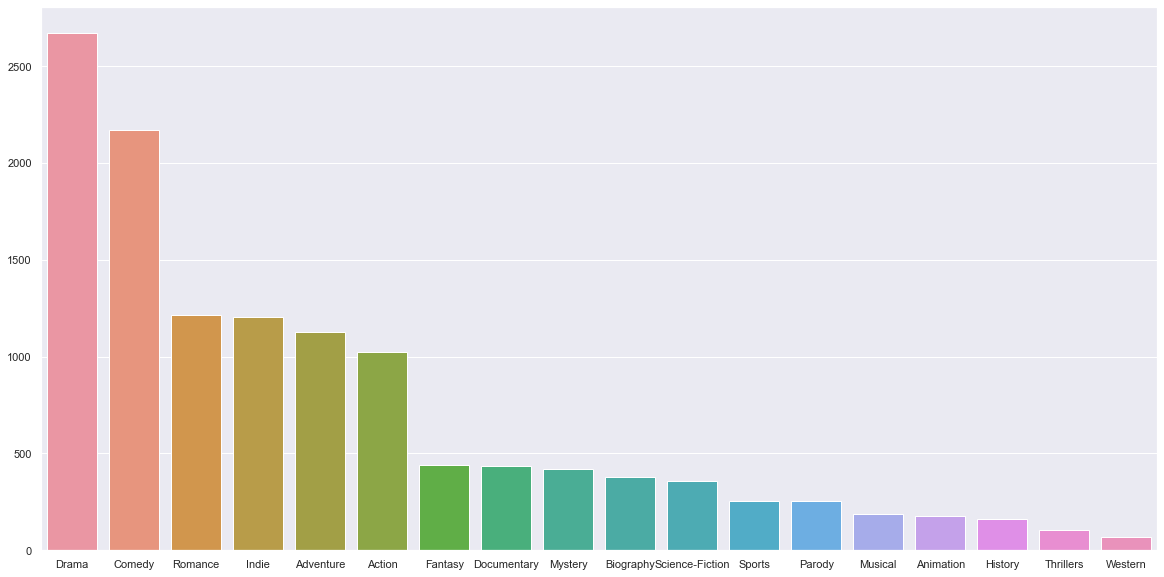

In [100]:
sums = Genres_aggregated_df.sum(axis=0).sort_values(ascending=False)

indexes = sums.index
counts = list(sums.values)
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = indexes, y = counts)

In [118]:
# We then print some values to see what proportions of movies belong to each categories, in descending order
num_movies = Genres_aggregated_df.shape[0]
print('Percentages of movies belonging to each genres :')
for genre in indexes:
    print(genre, f'{round(sums[genre]/num_movies*100, 2)}%')

print('\n')   
#We then see what proportions of movie are left without any genres to fit into
print(f'There are {round((1-Genres_aggregated_df.max(axis="columns").sum()/num_movies) * 100, 2)}% of movies left in our dataset that do not have any genres left')

Percentages of movies belonging to each genres :
Drama 52.56%
Comedy 42.67%
Romance 23.93%
Indie 23.69%
Adventure 22.2%
Action 20.13%
Fantasy 8.69%
Documentary 8.55%
Mystery 8.26%
Biography 7.45%
Science-Fiction 7.06%
Sports 5.01%
Parody 4.99%
Musical 3.64%
Animation 3.44%
History 3.15%
Thrillers 2.1%
Western 1.36%


There are 3.03% of movies left in our dataset that do not have any genres left


### Part 4: Analysis of the box office through the years
We take a look at what the revenue distribution for movie looks like for our filtered dataset. 

In [120]:
stats = movies_df['domestic_movie_box_office_revenue'].describe()
    
# Print the statistics
print(" Box office descriptive Statistics:")
print(stats)

 Box office descriptive Statistics:
count    5.091000e+03
mean     2.932998e+07
std      5.337477e+07
min      3.000000e+01
25%      2.955880e+05
50%      8.008255e+06
75%      3.563219e+07
max      7.605076e+08
Name: domestic_movie_box_office_revenue, dtype: float64


[Text(0.5, 1.0, 'Revenue distribution')]

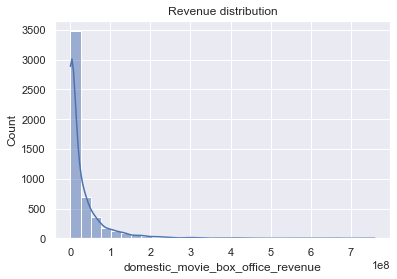

In [66]:
# Compute the distribution for our movie datasets in terms of box office revenues
sns.histplot(movies_df["domestic_movie_box_office_revenue"], bins=30, kde=True).set(title = 'Revenue distribution')


However, we see that our distribution is extremely skewed : we have a long tailed distribution. As such, it seems interesting to take a look at our data using a log plot for our x-axis to get a better idea of the way movies are spread in terms of revenues. 

[Text(0.5, 1.0, 'Revenue distribution')]

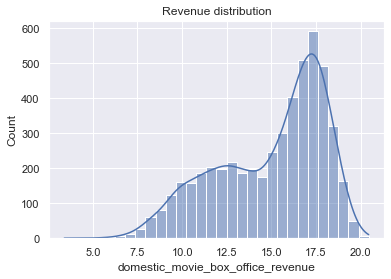

In [63]:
#PLot the distribution for the log normalized box offices 
sns.histplot(np.log(movies_df["domestic_movie_box_office_revenue"]), bins=30, kde=True).set(title = 'Revenue distribution')


In [72]:
# Describe the box office revenue per year
for year in range(first_year, last_year+1):
    # Calculate descriptive statistics for each column
    stats = movies_df[movies_df["movie_release_date"].dt.year == year]["domestic_movie_box_office_revenue"].describe()
    
    # Print the statistics
    print(f"{year} Descriptive Statistics:")
    print(stats)
    print("\n" + "-"*65 + "\n")

1992 Descriptive Statistics:
count    1.700000e+02
mean     2.776255e+07
std      4.106705e+07
min      1.100000e+03
25%      1.675486e+06
50%      1.281070e+07
75%      3.170680e+07
max      2.173502e+08
Name: domestic_movie_box_office_revenue, dtype: float64

-----------------------------------------------------------------

1993 Descriptive Statistics:
count    1.860000e+02
mean     2.465129e+07
std      4.246170e+07
min      1.836900e+04
25%      2.802671e+06
50%      1.092577e+07
75%      3.171260e+07
max      4.028281e+08
Name: domestic_movie_box_office_revenue, dtype: float64

-----------------------------------------------------------------

1994 Descriptive Statistics:
count    1.930000e+02
mean     2.589903e+07
std      4.922593e+07
min      1.166900e+04
25%      2.694234e+06
50%      1.042464e+07
75%      2.505200e+07
max      4.227838e+08
Name: domestic_movie_box_office_revenue, dtype: float64

-----------------------------------------------------------------

1995 Descript

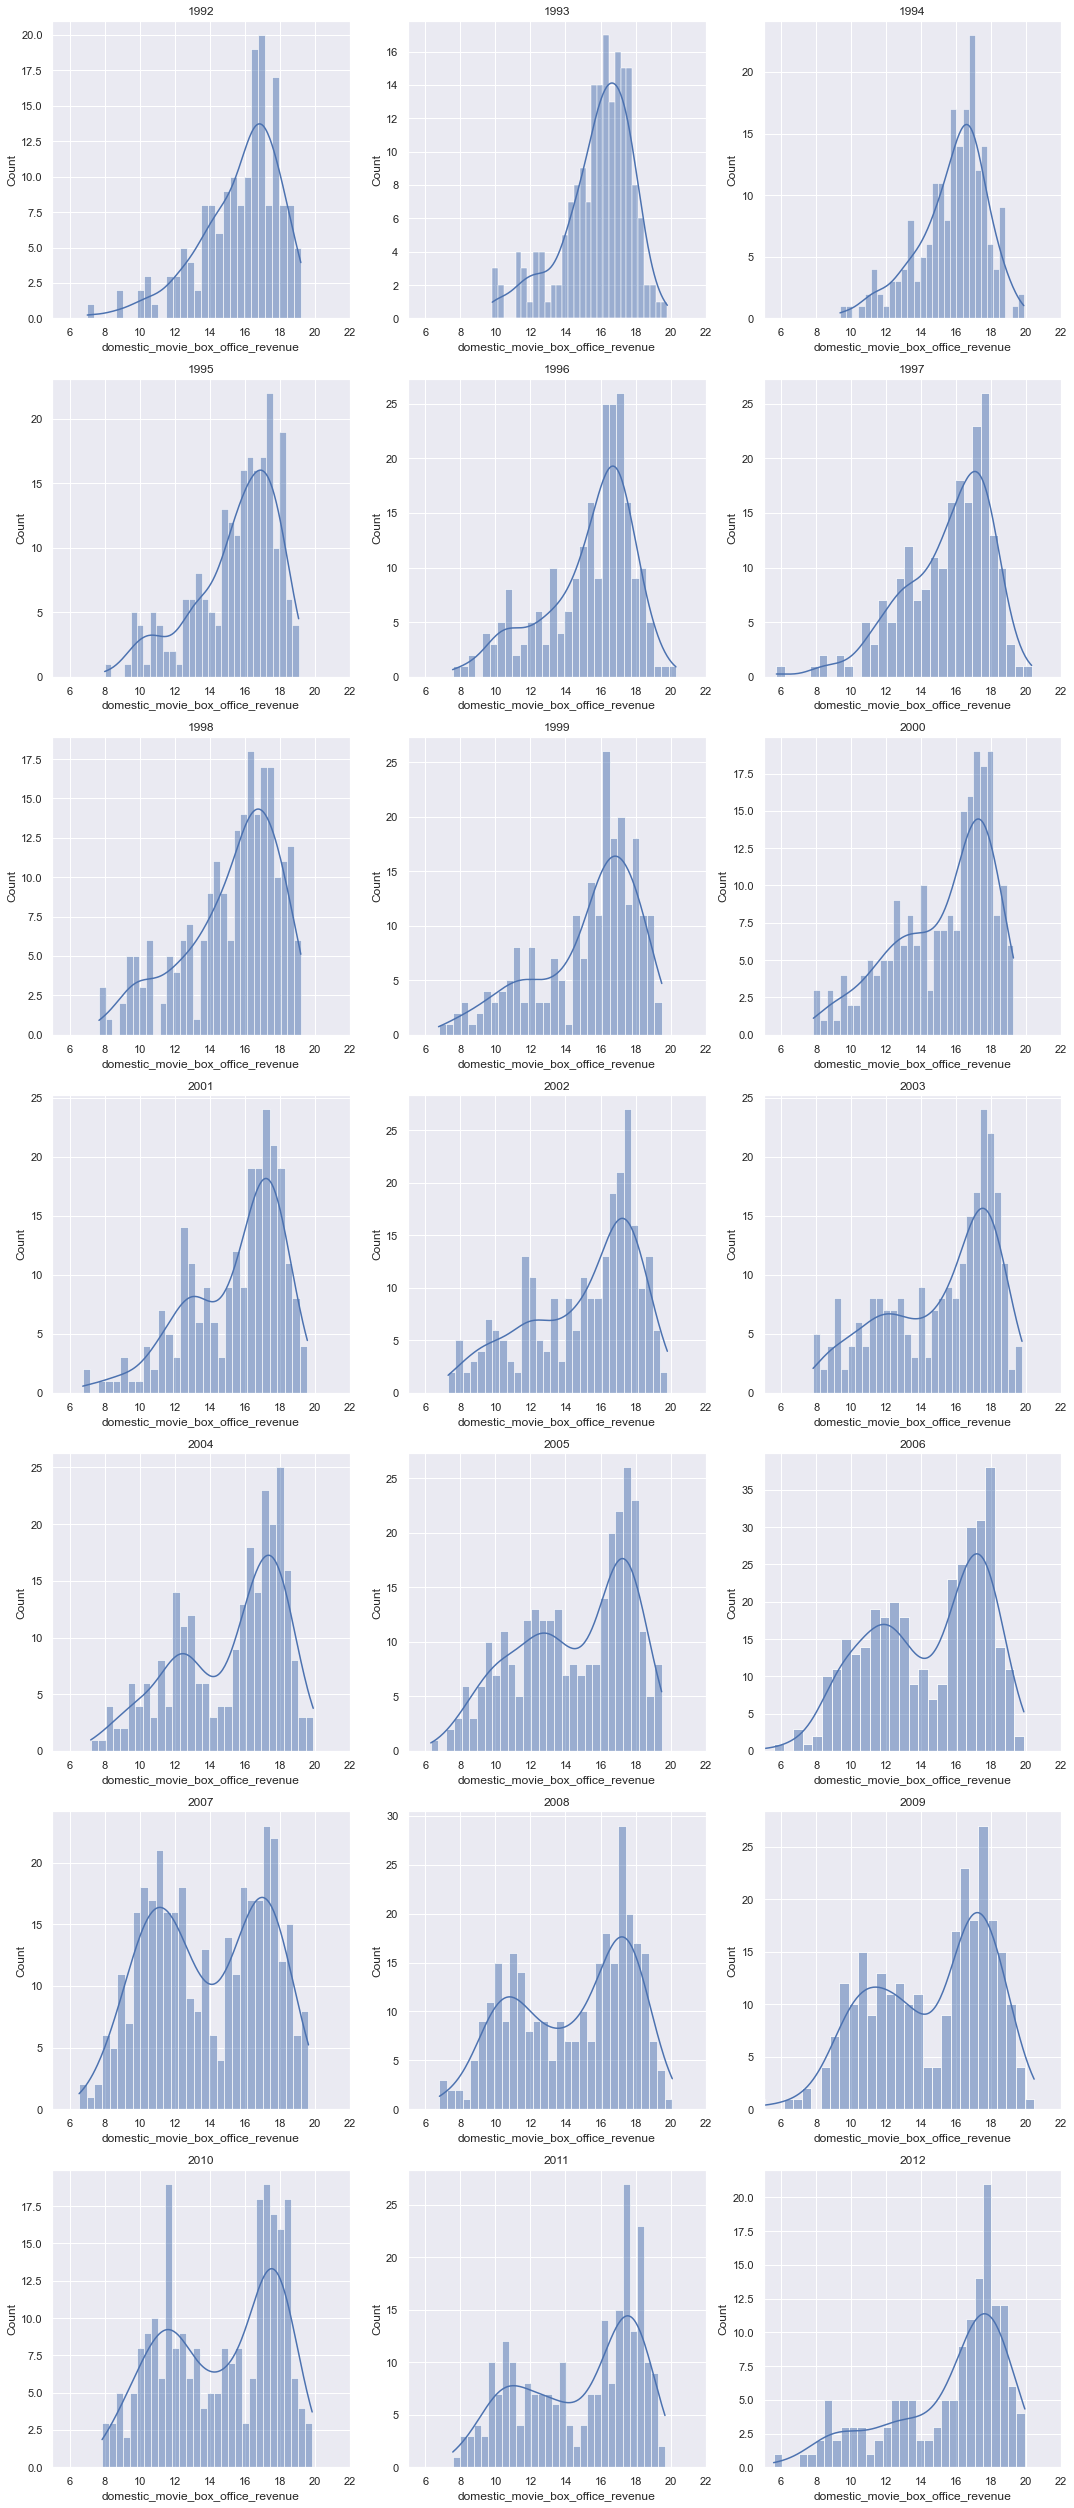

In [78]:
sns.set(style="darkgrid")


# We have 21 years of data for our choice of analysis, so we showcase 3 years per row
n_rows = 7
n_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Plot the box office distribution for each year of our analysis
for year in range(first_year, last_year + 1):
    position = year - first_year
    row = position//3
    col = position%3
    ax = axes[row, col]
    ax.set_xlim(5,22)
    
    sns.histplot(np.log(movies_df[movies_df["movie_release_date"].dt.year == year]["domestic_movie_box_office_revenue"]), bins=30, ax=ax, kde=True)
    ax.set_title(f'{year}')

plt.tight_layout()
plt.show()

### The effect of inflation
We notice that, overall, the mean tends to increase throughout the year. The issue currently is that this analysis does not factor in the inflation rate, which means that the data is skewed for older movies. To correct this effect, we add a column to our dataset to include the inflation corrected box offices.
There is no perfect method to account for this inflation rate, as many elements must be considered (prices of the tickets vs the inflation rate namely, types of tickets used and so on). The method selected here is to use the mean inflation rate between the release year X and the year 2012 (since this is the last year of our dataset). In practice, this corresponds to what a dollar in year X would be worth in 2012.


In [49]:
inflation_rates_df = pd.read_csv('./Inflation rate.csv', index_col='Year', sep=';', decimal=',')

# This function allow us to get the inflation rate for a given year
def get_inflation_rate(year):
    return inflation_rates_df.loc[year]['Factor']

# Multiply the inflation rate for the release year by the box office to compute the inflation corrected value
movies_df['Inflation_corrected_box_office'] = movies_df['movie_release_date'].dt.year.apply(get_inflation_rate) * movies_df['domestic_movie_box_office_revenue']

With this new column, we repeat the analysis from before to get a better idea of the actual box office distribution

In [74]:
stats = movies_df['Inflation_corrected_box_office'].describe()
    
# Print the statistics
print(" Box office descriptive Statistics:")
print(stats)

 Box office descriptive Statistics:
count    5.091000e+03
mean     3.720247e+07
std      6.702473e+07
min      3.480000e+01
25%      3.803907e+05
50%      1.067481e+07
75%      4.534297e+07
max      9.824523e+08
Name: Inflation_corrected_box_office, dtype: float64


[Text(0.5, 1.0, 'Inflation corrected revenue distribution')]

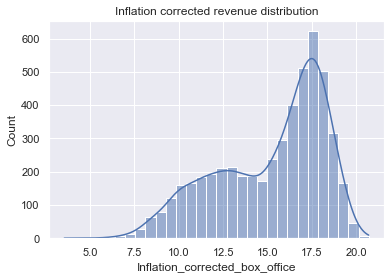

In [62]:
# Compute the distribution for our movie datasets in terms of box office revenues
sns.histplot(np.log(movies_df["Inflation_corrected_box_office"]), bins=30, kde=True).set(title = 'Inflation corrected revenue distribution')


In [73]:
# Describe the box office revenue corrected for inflation per year
for year in range(first_year, last_year+1):
    # Calculate descriptive statistics for each column
    stats = movies_df[movies_df["movie_release_date"].dt.year == year]["Inflation_corrected_box_office"].describe()
    
    # Print the statistics
    print(f"{year} Descriptive Statistics:")
    print(stats)
    print("\n" + "-"*65 + "\n")

1992 Descriptive Statistics:
count    1.700000e+02
mean     4.608583e+07
std      6.817131e+07
min      1.826000e+03
25%      2.781307e+06
50%      2.126575e+07
75%      5.263329e+07
max      3.608014e+08
Name: Inflation_corrected_box_office, dtype: float64

-----------------------------------------------------------------

1993 Descriptive Statistics:
count    1.860000e+02
mean     3.968858e+07
std      6.836333e+07
min      2.957409e+04
25%      4.512300e+06
50%      1.759049e+07
75%      5.105729e+07
max      6.485533e+08
Name: Inflation_corrected_box_office, dtype: float64

-----------------------------------------------------------------

1994 Descriptive Statistics:
count    1.930000e+02
mean     4.066148e+07
std      7.728471e+07
min      1.832033e+04
25%      4.229947e+06
50%      1.636669e+07
75%      3.933164e+07
max      6.637705e+08
Name: Inflation_corrected_box_office, dtype: float64

-----------------------------------------------------------------

1995 Descriptive Stati

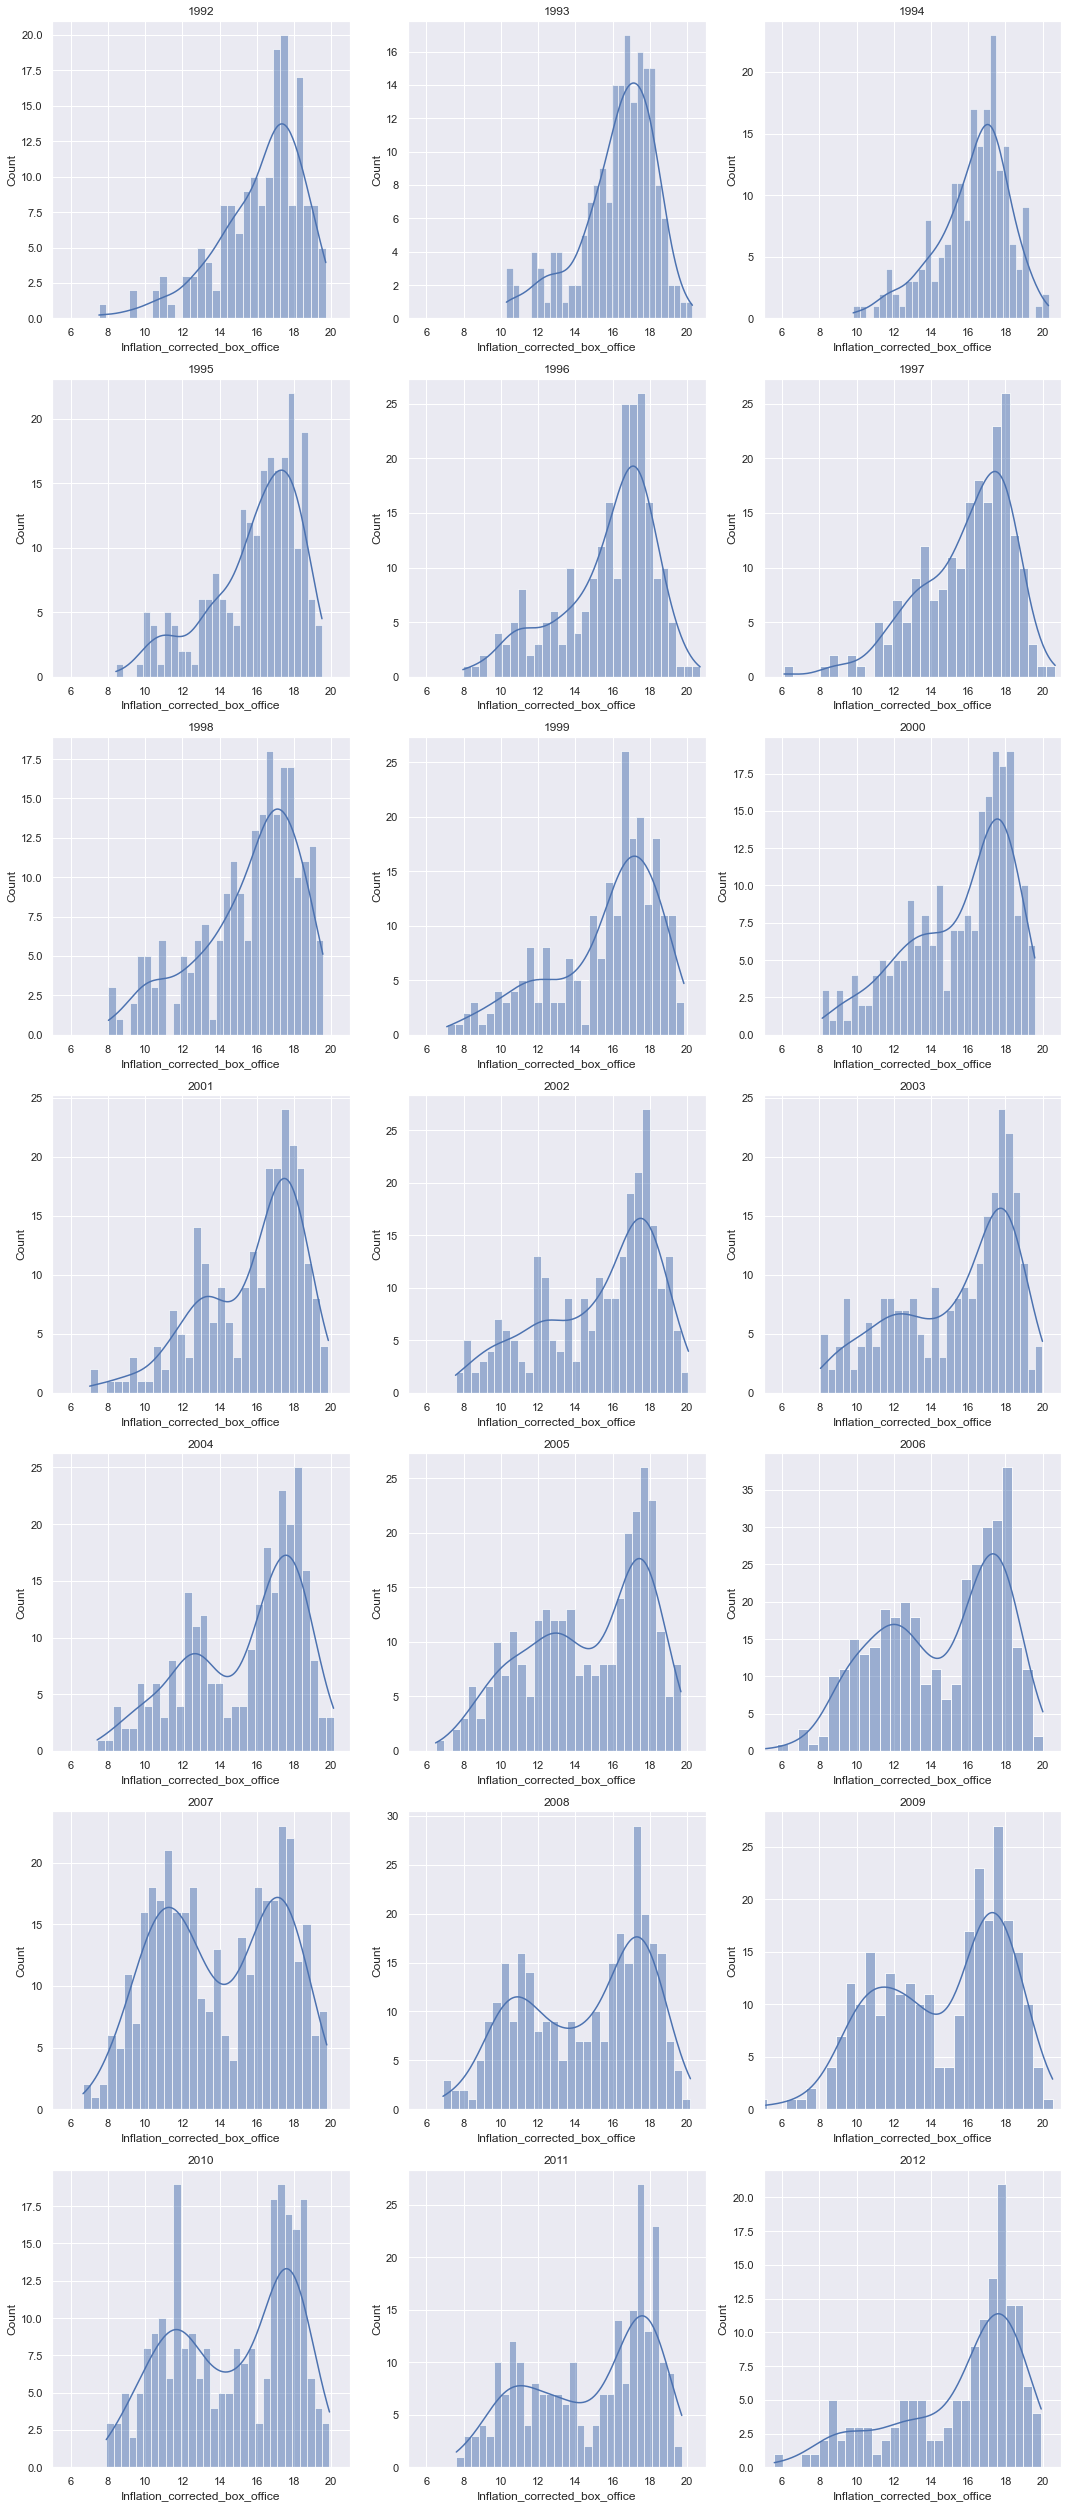

In [69]:
sns.set(style="darkgrid")


# We have 21 years of data for our choice of analysis, so we showcase 3 years per row
n_rows = 7
n_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Plot the box office distribution for each year of our analysis
for year in range(first_year, last_year + 1):
    position = year - first_year
    row = position//3
    col = position%3
    ax = axes[row, col]
    ax.set_xlim(5,21)
    
    sns.histplot(np.log(movies_df[movies_df["movie_release_date"].dt.year == year]["Inflation_corrected_box_office"]), bins=30, ax=ax, kde=True)
    ax.set_title(f'{year}')

plt.tight_layout()
plt.show()

Link for inflation : https://www.bls.gov/data/inflation_calculator.htm